***Summary: This notebook provides an overview of the nitrogen cross sections from fict that are in NEPC.***

In [1]:
import nepc
from nepc.util import config
import numpy as np
import pandas as pd

In [2]:
pd.set_option('max_colwidth', 100)

***NOTE: You may need to modify the `local` argument in the next command.  `local=True` points to a local copy of the NEPC database. `local=False` points to a computer serving a NEPC MySQL database. See `nepc.util.config.production()` and set the `$NEPC_PRODUCTION` environment variable.***

In [4]:
cnx, cursor = nepc.connect(local=True, test=True)

# Full fict dataset

In [5]:
fict = nepc.Model(cursor, "fict")

In [6]:
type(fict.summary())

Number of cross sections in model: 30


pandas.io.formats.style.Styler

In [7]:
fict.summary()

Number of cross sections in model: 30


,cs_id,specie,lhsA,rhsA,process,reaction,threshold,E_peak,E_upper,sigma_max,lpu,upu
0,1,N2,N2(X1Sigmag+),N2(X1Sigmag+)_jSCHULZ,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+ j=SCHULZ$) + e$^-$,0.02,2.3,3.6,6.9e-20,-1,-1
1,2,N2,N2,N2,total,e$^-$ + N${}_2$ $\rightarrow$ N${}_2$ + e$^-$,-1,2.5,10000,3e-19,-1,-1
2,3,N2,N2(X1Sigmag+),N2(X1Sigmag+)_jSLAR,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+ j=SLAR$) + e$^-$,0.02,2.3,3.6,2.77e-20,-1,-1
3,4,N2,N2(X1Sigmag+),N2(X1Sigmag+),excitation_v,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$ v=0) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+$ v=1) + e$^-$,0.29,1.6,50,1.5e-21,-1,-1
4,5,N2,N2(X1Sigmag+),N2(X1Sigmag+),excitation_v,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$ v=0) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+$ v=1) + e$^-$,0.292,2,3.6,4.8e-20,-1,-1
5,6,N2,N2(X1Sigmag+),N2(X1Sigmag+),excitation_v,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$ v=0) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+$ v=2) + e$^-$,0.59,2.2,3.5,3.3e-20,-1,-1
6,7,N2,N2(X1Sigmag+),N2(X1Sigmag+),excitation_v,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$ v=0) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+$ v=3) + e$^-$,0.88,2.3,3.3,2.7e-20,-1,-1
7,8,N2,N2(X1Sigmag+),N2(X1Sigmag+),excitation_v,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$ v=0) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+$ v=4) + e$^-$,1.17,2.3,3.3,2.385e-20,-1,-1
8,9,N2,N2(X1Sigmag+),N2(X1Sigmag+),excitation_v,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$ v=0) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+$ v=5) + e$^-$,1.47,2.2,3.3,1.53e-20,-1,-1
9,10,N2,N2(X1Sigmag+),N2(X1Sigmag+),excitation_v,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$ v=0) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+$ v=6) + e$^-$,1.76,2.5,3.2,1.72e-20,-1,-1


To inspect the `metadata` or `data` attribute of a particular cross section, use the `Model.subset` method.

In [8]:
fict.subset(metadata={'cs_id': 10})[0].metadata

{'cs_id': 10,
 'species': 'N2',
 'process': 'excitation_v',
 'units_e': 1.0,
 'units_sigma': 1.0,
 'ref': '\\N',
 'lhsA': 'N2(X1Sigmag+)',
 'lhsB': None,
 'rhsA': 'N2(X1Sigmag+)',
 'rhsB': None,
 'threshold': 1.76,
 'wavelength': -1.0,
 'lhs_v': 0,
 'rhs_v': 6,
 'lhs_j': -1,
 'rhs_j': -1,
 'background': 'N2 VIBRATIONAL (V=6) Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur.',
 'lpu': -1.0,
 'upu': -1.0,
 'lhsA_long': 'N${}_2$ (X ${}^1\\Sigma_g^+$)',
 'lhsB_long': None,
 'rhsA_long': 'N${}_2$ (X ${}^1\\Sigma_g^+$)',
 'rhsB_long': None,
 'e_on_lhs': 1,
 'e_on_rhs': 1,
 'hv_on_lhs': 0,
 'hv_on_rhs': 0,
 'v_on_lhs': 1,
 'v_on_rhs': 1,
 'j_on_lhs': 0,
 'j_on_rhs': 0}

# Electron-impact excitations provided by Model `fict`

Note: the `fict`, `fict_min` or `fict_min2` models should **NOT** be used for simulations. These are populated with fictitious cross section data for testing and demonstration purposes only.

See the `01_lxcat_n2_fict.py` script in  `curate` for details on how the data are curated starting from the LXCat text file.

All excitations (pure electronic, rotational, and vibrational) of $\text{N}_2$ are from the ground electronic state, $\text{N}_2 (\text{X} {}^1\Sigma_g^+)$.

There is no data in `fict` to support follow-on excitation of excited states.

Vibrational excitations, $v_{0\rightarrow n}, n \in \{1, ..., 8\}$, of the ground electronic state, $\text{N}_2 (\text{X} {}^1\Sigma_g^+)$, are supported. $v_{0\rightarrow 1}$ is provided in two separate data sets. 

Excitation from $\text{N}_2 (\text{X} {}^1\Sigma_g^+)$ to $\text{N}_2 (\text{A} {}^3\Sigma_u^+)$ are vibrationally resolved, but not completely. The cross sections are lumped into three fictitious vibronic levels: $v=(0-4)$, $v=(5-9)$, and $v=(10-)$.

Cross sections for excitation to the three singlets above the N${}_2$ (a${}^{''}$ ${}^1\Sigma_g^+$) state are lumped together in the fictitious N${}_2$ $(1SUM)_{Z-M}$) state.

Rotational excitations within the $\text{N}_2 (\text{X} {}^1\Sigma_g^+)$ state are supported via the single level approximation to rotation (SLAR). Another option would be to use the cross sections for the resonance region (provided) along with the CAR approximation (not provided) in place of the SLAR approximation.

De-excitation rates should be computed using detailed balance.

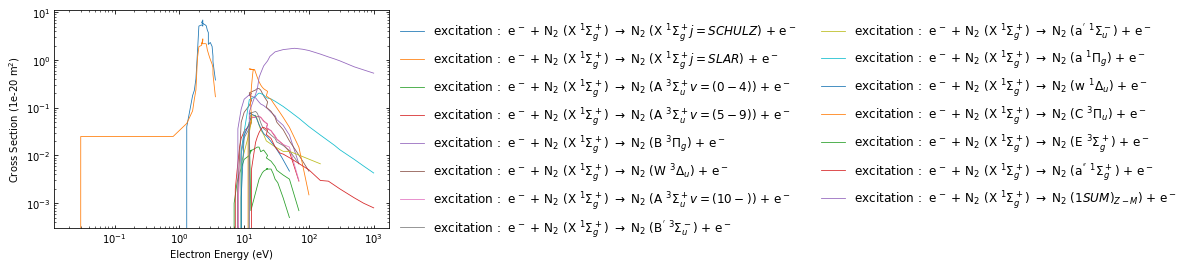

In [9]:
fict.plot(units_sigma=1E-20, process='excitation',
              plot_param_dict = {'linewidth':.8}, 
              #xlim_param_dict = {'left': 0.01, 'right': 120.0}, 
              ylog=True, xlog=True, max_plots=40, width=8, height=4) 

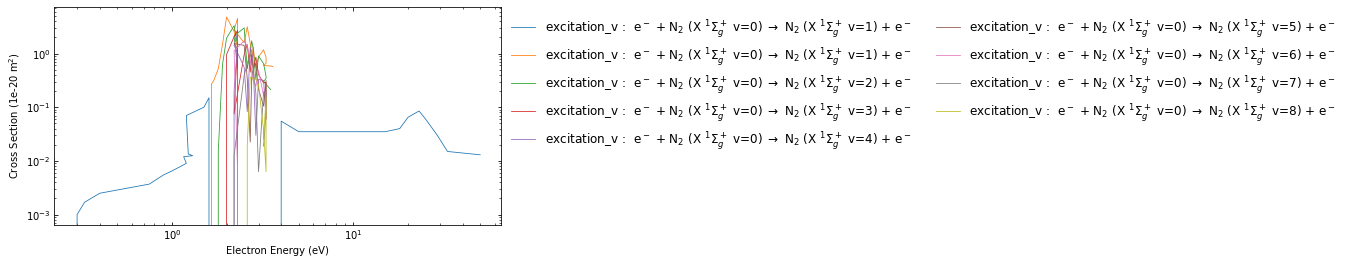

In [10]:
fict.plot(units_sigma=1E-20, process='excitation_v',
              plot_param_dict = {'linewidth':.8}, 
              #xlim_param_dict = {'left': 0.01, 'right': 120.0}, 
              ylog=True, xlog=True, max_plots=40, width=8, height=4) 

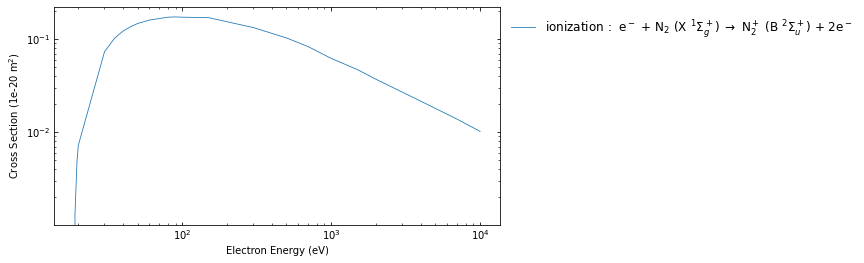

In [11]:
fict.plot(units_sigma=1E-20, process='ionization',
              plot_param_dict = {'linewidth':.8}, 
              #xlim_param_dict = {'left': 0.01, 'right': 120.0}, 
              ylog=True, xlog=True, max_plots=40, width=8, height=4) 

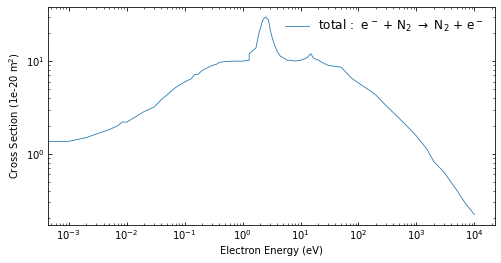

In [12]:
fict.plot(units_sigma=1E-20, process='total',
              plot_param_dict = {'linewidth':.8}, 
              #xlim_param_dict = {'left': 0.01, 'right': 120.0}, 
              ylog=True, xlog=True, max_plots=40, width=8, height=4) 

# `fict_min`

The `fict_min` model consists of three cross section data sets.

1. The `total` cross section (labelled "effective" in LXCat parlance) from the complete `fict` data set.

2. The `ionization_total` cross section from the complete `fict` data set.

3. An `excitation_total` cross section determined by interpolating and summing the electronic, rotational, and vibtrational excitations from the complete `fict` data set. See the `02_fict_excitation_total.ipynb` Jupyter Notebook in  `methods` for details on how it is constructed.

In [13]:
n_fict_min = nepc.Model(cursor, "fict_min")

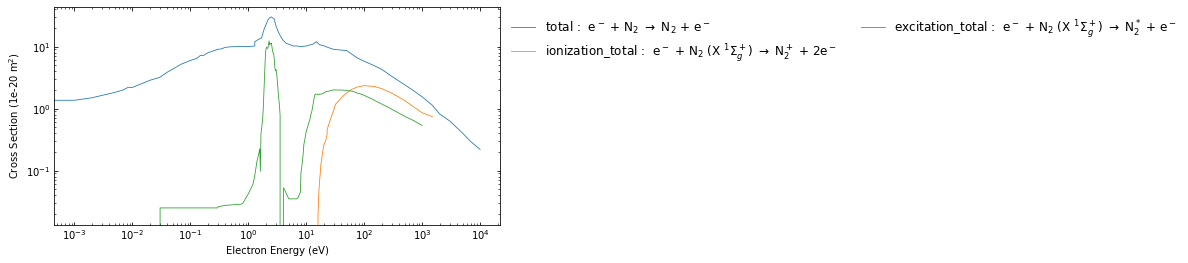

In [14]:
n_fict_min.plot(units_sigma=1E-20,
              plot_param_dict = {'linewidth':.8}, 
              #xlim_param_dict = {'left': 0.01, 'right': 120.0}, 
              ylog=True, xlog=True, max_plots=40, width=8, height=4) 

# `fict_min2`

The `fict_min2` model consists of five cross section data sets.

1. The `total` cross section (labelled "effective" in LxCat parlance) from the complete `fict` data set.

2. The `ionization_total` cross section from the complete `fict` data set.

3. An `excitation` cross section for rotational excitations within the $\text{N}_2 (\text{X} {}^1\Sigma_g^+)$ state using the single level approximation to rotation (SLAR). This, too, is directly from the complete `fict` data set.

4. (and 5.) Two `excitation_total` cross sections determined by interpolating and summing the electronic (and vibrational) excitations from the the $\text{N}_2 (\text{X} {}^1\Sigma_g^+)$ state. See the `02_fict_excitation_total.ipynb` Jupyter Notebook in  `methods` for details on how it is constructed.

In [15]:
fict_min2 = nepc.Model(cursor, "fict_min2")

In [16]:
fict_min2.summary()

Number of cross sections in model: 5


,cs_id,specie,lhsA,rhsA,process,reaction,threshold,E_peak,E_upper,sigma_max,lpu,upu
0,2,N2,N2,N2,total,e$^-$ + N${}_2$ $\rightarrow$ N${}_2$ + e$^-$,-1,2.5,10000,3e-19,-1,-1
1,3,N2,N2(X1Sigmag+),N2(X1Sigmag+)_jSLAR,excitation,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+ j=SLAR$) + e$^-$,0.02,2.3,3.6,2.77e-20,-1,-1
2,26,N2,N2(X1Sigmag+),N2+,ionization_total,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2^+$ + 2e$^-$,15.6,100,1500,2.3436e-20,-1,-1
3,29,N2,N2(X1Sigmag+),N2*,excitation_total,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2^*$ + e$^-$,6.17,30.1995,1000,1.98645e-20,-1,-1
4,30,N2,N2(X1Sigmag+),N2(X1Sigmag+)_v1-8),excitation_total,e$^-$ + N${}_2$ (X ${}^1\Sigma_g^+$) $\rightarrow$ N${}_2$ (X ${}^1\Sigma_g^+ v=(1-8)$) + e$^-$,0.29,2.29087,48.9779,9.83258e-20,-1,-1


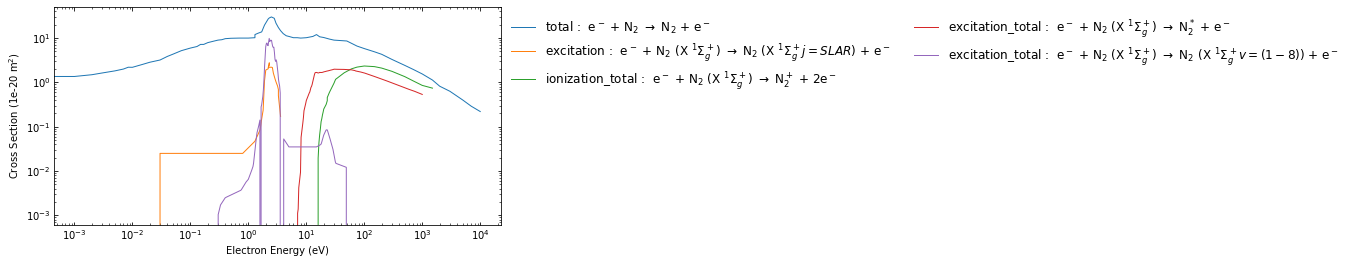

In [17]:
fict_min2.plot(ylog=True, xlog=True, width=8, height=4) 

In [18]:
cnx.close()